## Telecom Churn Case Study

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Understanding the Business Objective

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful

### To Predict: 

To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### 1. Data Understanding

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report,confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
sns.set_style("whitegrid")

In [2]:
# dataset
tele_df = pd.read_csv('telecom_churn_data.csv')
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#Checking the shape of the data set. It consists of 99999 rows and 226 columns.
tele_df.shape

(99999, 226)

In [4]:
#Checking the info of each column of our dataset
tele_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [5]:
#Checking the null values in the dataset
df=((tele_df.isnull().sum()/len(tele_df.index))*100).sort_values(ascending=False)
df

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

### 2. EDA

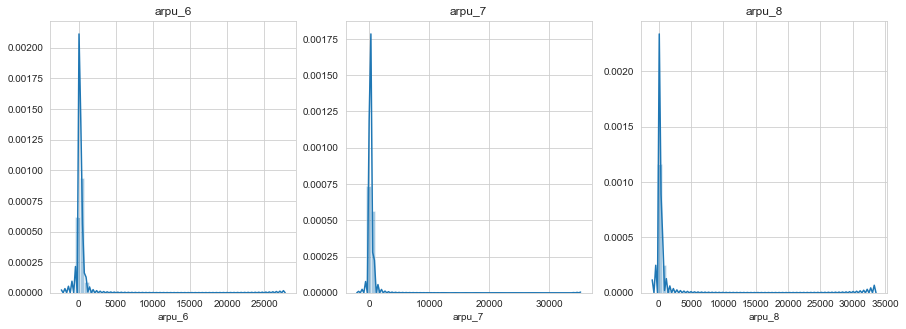

In [6]:
#Plotting the average revenue per user for 6th, 7th and 8th month
plt.figure(figsize=[15,5])
# subplot 1
plt.subplot(1, 3, 1)
plt.title('arpu_6')
sns.distplot(tele_df["arpu_6"])

# subplot 2
plt.subplot(1, 3, 2)
plt.title("arpu_7")
sns.distplot(tele_df["arpu_7"])

# subplot 3
plt.subplot(1, 3, 3)
plt.title("arpu_8")
sns.distplot(tele_df["arpu_8"])

plt.show()

#### Analysis on recharge amount data

In [7]:
# let us first extract list of columns containing recharge amount
recharge_amnt_columns =  tele_df.columns[tele_df.columns.str.contains('rech_amt|rech_data')]

print(recharge_amnt_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


we observe from above that there are 5 set of values for

total recharge amount,                                                                                                         
maximum recharge amount and                                                                                                     
average recharge amount for data                                                                                               
total recharge for data                                                                                                         
maximum recharge for data

In [8]:
# let us check if there are any missing values for recharge amount
100*tele_df.loc[:,recharge_amnt_columns].isnull().sum()/len(tele_df)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

we observe that approx 74-75% values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.

In [9]:
recharge_amnt_columns_6 = tele_df.columns[tele_df.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

tele_df.loc[:,recharge_amnt_columns_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


We can see that total_rech_data has discrete values and the non NA values for total_rech_data and av_rech_amt_data is the same, thus we can find out the total recharge amount for data from the two.

In [10]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = tele_df['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = tele_df['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = tele_df['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(tele_df.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(tele_df.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(tele_df.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = tele_df['total_rech_data_6'] == np.nan 
is_invalid_data_7 = tele_df['total_rech_data_7'] == np.nan 
is_invalid_data_8 = tele_df['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(tele_df.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(tele_df.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(tele_df.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


We see from above the values are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.

In [11]:
tele_df.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
tele_df.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [12]:
tele_df.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
tele_df.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [13]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
tele_df['total_rech_amt_data_6'] = tele_df.av_rech_amt_data_6*tele_df.total_rech_data_6
tele_df['total_rech_amt_data_7'] = tele_df.av_rech_amt_data_7*tele_df.total_rech_data_7
tele_df['total_rech_amt_data_8'] = tele_df.av_rech_amt_data_8*tele_df.total_rech_data_8

We will define total average recharge amount for good phase as the average of total recharge amount and total recharge amount for data for months 6 and 7 (good phase months).

In [14]:
tele_df['total_avg_rech_amnt_good_ph'] = (tele_df.total_rech_amt_6 +tele_df.total_rech_amt_data_6 \
                                               + tele_df.total_rech_amt_7+tele_df.total_rech_amt_data_7)/4

We define High Value Customer as those who have total average recharge amount for good phase greater than the 70th percentile value.

In [15]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = tele_df.total_avg_rech_amnt_good_ph >= tele_df.total_avg_rech_amnt_good_ph.quantile(0.7)

In [16]:
# let us subset out the High Value customers
tele_df = tele_df.loc[high_value_filter,:]

In [17]:
# let us check how many records remain
len(tele_df.loc[high_value_filter,:])

30001

##### creating labels for churned customers

In [18]:
# Now let us label the churned customers
# define a new column in data frame as 'churn' with value as 1 if customer has churned and 0 if customer has not churned
# Initially set all the values as 0
tele_df['churn']= 0

In [19]:
# the following columns will be used to find the churned customers in the 9th month 
# total_ic_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9
# let's check if any NA/Null values are present
ls_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*tele_df.loc[:,ls_9].isnull().sum()/len(tele_df)

total_ic_mou_9    0.0
total_ic_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [20]:
# is_churned is defined as a boolean flag for customers where above values (minutes of usage) are zero
is_churned = (tele_df.total_ic_mou_9 == 0) & (tele_df.total_ic_mou_9 == 0) & (tele_df.vol_2g_mb_9 ==0)& \
(tele_df.vol_3g_mb_9 ==0)
is_churned.head()

0      True
7      True
8     False
21    False
23    False
dtype: bool

In [21]:
# setting all such rows fulfilling is_churned condition as 1
tele_df.loc[is_churned,'churn']=1

In [22]:
# let us check the % of churned customers
100*tele_df.churn.sum()/len(is_churned)

8.406386453784874

We see that approx. 8.4% of high value customers have churned

In [23]:
# let's extract all list of 9th Month (churned month) Columns
month_9_columns =  tele_df.columns[tele_df.columns.str.contains('_9')]

In [24]:
# drop all columns corresponding to the attributes of churn phase
tele_df.drop(month_9_columns,axis=1,inplace=True)

In [25]:
# let's check how many columns remain
print(tele_df.info(verbose=True,null_counts=True))
print(tele_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 177 columns):
mobile_number                  30001 non-null int64
circle_id                      30001 non-null int64
loc_og_t2o_mou                 29777 non-null float64
std_og_t2o_mou                 29777 non-null float64
loc_ic_t2o_mou                 29777 non-null float64
last_date_of_month_6           30001 non-null object
last_date_of_month_7           29974 non-null object
last_date_of_month_8           29836 non-null object
arpu_6                         30001 non-null float64
arpu_7                         30001 non-null float64
arpu_8                         30001 non-null float64
onnet_mou_6                    29456 non-null float64
onnet_mou_7                    29464 non-null float64
onnet_mou_8                    28827 non-null float64
offnet_mou_6                   29456 non-null float64
offnet_mou_7                   29464 non-null float64
offnet_mou_8                   28

In [26]:
(100*tele_df.isnull().sum()/len(tele_df.index)).sort_values(ascending=False)

count_rech_2g_8                46.825106
count_rech_3g_8                46.825106
max_rech_data_8                46.825106
arpu_3g_8                      46.825106
arpu_2g_8                      46.825106
fb_user_8                      46.825106
date_of_last_rech_data_8       46.825106
night_pck_user_8               46.825106
fb_user_6                      44.148528
date_of_last_rech_data_6       44.148528
count_rech_2g_6                44.148528
max_rech_data_6                44.148528
night_pck_user_6               44.148528
count_rech_3g_6                44.148528
arpu_2g_6                      44.148528
arpu_3g_6                      44.148528
date_of_last_rech_data_7       43.145228
fb_user_7                      43.145228
arpu_2g_7                      43.145228
arpu_3g_7                      43.145228
night_pck_user_7               43.145228
count_rech_3g_7                43.145228
count_rech_2g_7                43.145228
max_rech_data_7                43.145228
loc_og_t2m_mou_8

##### Feature Engineering
Let's create a function to analyze_feature across months 6,7 (good phase) and 8.This function will do the following:

create box plots to compare variable distribution across months 6,7 and 8 for churn and non-churn customers.
create summary of the mean and standard deviation of variable distribution across months 6,7 and 8 for churn and non-churn customers.

In [27]:
 # create function to anlyze the features across 6th, 7th and 8th month
def analyze_features(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": tele_df[tele_df["churn"] == churn][cols[6]].mean(),
        "mean_7": tele_df[tele_df["churn"] == churn][cols[7]].mean(),
        "mean_8": tele_df[tele_df["churn"] == churn][cols[8]].mean(),
        "std_6": tele_df[tele_df["churn"] == churn][cols[6]].std(),
        "std_7": tele_df[tele_df["churn"] == churn][cols[7]].std(),
        "std_8": tele_df[tele_df["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=tele_df, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=tele_df, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=tele_df, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

##### recharge amount related variables

In [28]:
#let's again extract the recharge amount related columns
recharge_amnt_columns =  tele_df.columns[tele_df.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,649.56,663.82,614.54,548.02,574.33,615.19
Non Churned,782.50,624.30,255.57,675.28,663.40,450.55


<Figure size 1224x504 with 0 Axes>

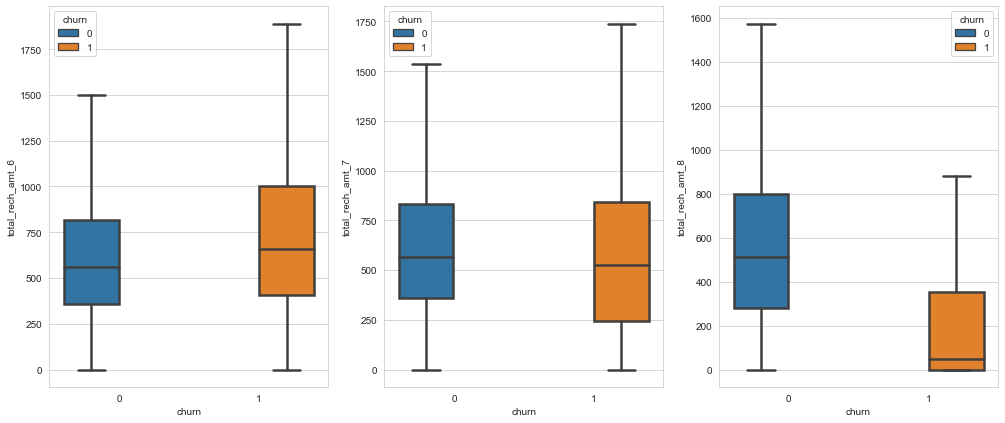

In [29]:
# let's analyze total recharge amount:
analyze_features('total_rech_amt')

We do see a drop in the total recharge amount for churned customers.

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7', 8: 'total_rech_amt_data_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,460.70,545.73,498.19,1447.90,1500.10,1685.29
Non Churned,402.12,337.63,82.54,1047.33,1165.83,470.96


<Figure size 1224x504 with 0 Axes>

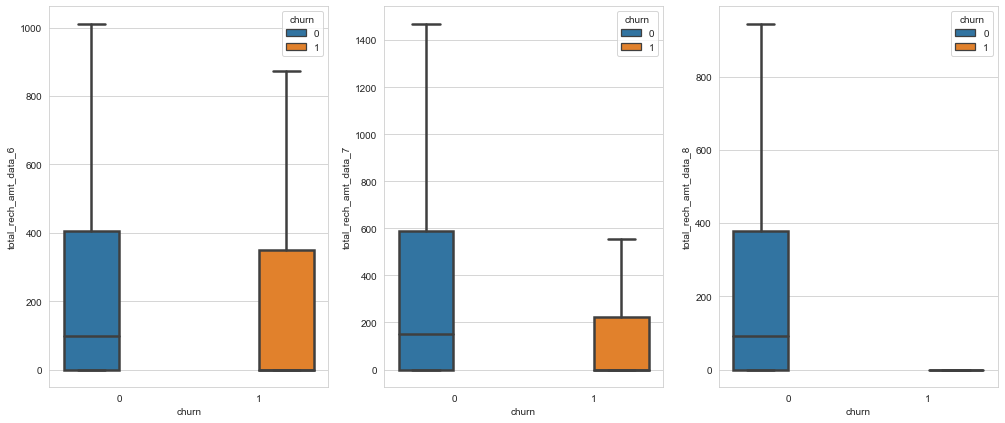

In [30]:
# let's analyze total recharge amount for data:
analyze_features('total_rech_amt_data')

We see that there is a significant drop in total recharge amount for data in 8th month (action phase) for churned customers.

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,168.85,173.23,166.78,171.50,176.37,170.97
Non Churned,173.98,161.00,87.89,212.49,228.85,180.84


<Figure size 1224x504 with 0 Axes>

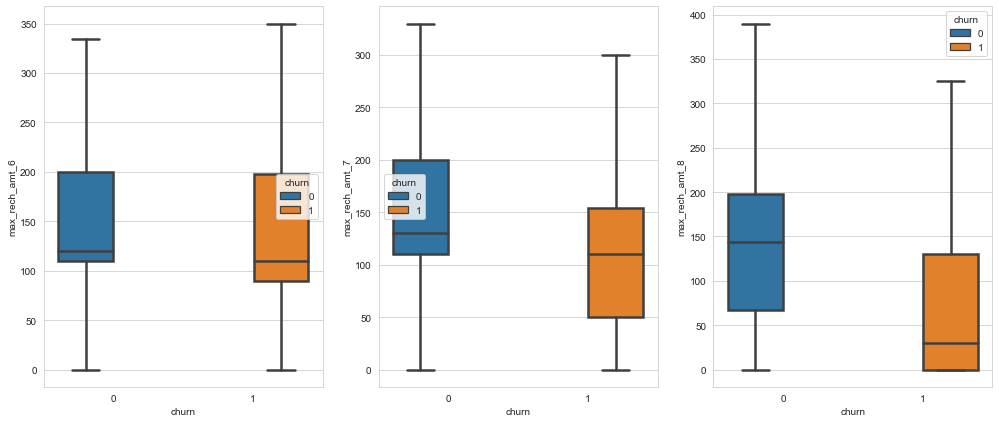

In [31]:
# let's analyze maximum recharge amount for data:
analyze_features('max_rech_amt')


We observe drop in maximum recharge amount as well.

As we have already derived total recharge amount for data using average recharge amount for data and total recharge for data let's drop these columns.

In [32]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
tele_df.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [33]:
tele_df.shape

(30001, 171)

In [34]:
# Let us define 3 new derived columns
# total average recharge amount for good phase: total_rech_amt_good_ph
# total average recharge amount data for good phase: total_rech_amt_data_good_ph
# max average recharge amount for good phase: max_rech_amt_good_ph

tele_df['total_rech_amt_good_ph'] = (tele_df.total_rech_amt_6 + tele_df.total_rech_amt_7)/2
tele_df['total_rech_amt_data_good_ph'] = (tele_df.total_rech_amt_data_6 + tele_df.total_rech_amt_data_7)/2
tele_df['max_rech_amt_good_ph'] = (tele_df.max_rech_amt_6 + tele_df.max_rech_amt_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
tele_df.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

##### last day recharge amount

In [35]:
#let's extract the last day recharge amount columns
last_day_rech_amt = tele_df.columns[tele_df.columns.str.contains('day')]

Churn Stats (mean and standard deviation):
{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,100.36,102.08,97.35,140.19,138.95,145.09
Non Churned,106.67,81.52,38.43,177.76,159.67,134.92


<Figure size 1224x504 with 0 Axes>

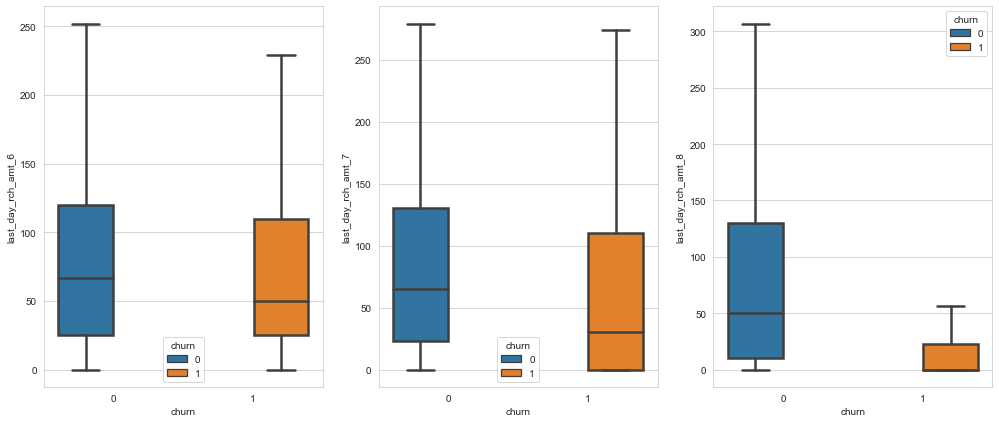

In [36]:
# let's check the mean variation in last day recharge for churned and non churned customers
analyze_features('last_day_rch_amt')

We can see that there is a significant drop in last month recharge amount for churned customers.

In [37]:
# Let us define new derived column
# last day recharge amount for good phase: last_day_rch_amt_good_ph
tele_df['last_day_rch_amt_good_ph'] = (tele_df.last_day_rch_amt_6 + tele_df.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)


##### other recharge related variables

In [38]:
# Let's check other recharge related variables:
ls_recharge = tele_df.columns[tele_df.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [39]:
# lets check the % of NA values for recharge related variables
100*tele_df.loc[:,ls_recharge].isnull().sum()/len(tele_df)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.148528
max_rech_data_7     43.145228
max_rech_data_8     46.825106
dtype: float64

In [40]:
# let's check the distribution for max_rech_data
tele_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


We see that the minimum value is 1 while the max is 1555 across months, which implies the missing values are cases where there was no recharge for data, let's impute the missing values by 0 indicating no recharge.

In [41]:
tele_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= tele_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [42]:
# Let us define new derived column
# maximum recharge for data for good phase: max_rech_data_good_ph
tele_df['max_rech_data_good_ph'] = (tele_df.max_rech_data_6 + tele_df.max_rech_data_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [43]:
# Let us define new derived column
# total recharge number for good phase: total_rech_num_good_ph
tele_df['total_rech_num_good_ph'] = (tele_df.total_rech_num_6 + tele_df.total_rech_num_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

##### 2G and 3G usage related variables

In [44]:
#let's extract the 2G and 3G usage related columns
typ_2g_or_3g = tele_df.columns[tele_df.columns.str.contains('2g|3g',regex=True)]

In [45]:
#let us check the % of NA values present
tele_df.loc[:,typ_2g_or_3g].isnull().sum()/len(tele_df.loc[:,typ_2g_or_3g])

count_rech_2g_6    0.441485
count_rech_2g_7    0.431452
count_rech_2g_8    0.468251
count_rech_3g_6    0.441485
count_rech_3g_7    0.431452
count_rech_3g_8    0.468251
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.441485
arpu_3g_7          0.431452
arpu_3g_8          0.468251
arpu_2g_6          0.441485
arpu_2g_7          0.431452
arpu_2g_8          0.468251
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

We see from above that about 60% values are not available for count of recharge and average revenue for 2G/3G per user. As we aleady have 2G/3G volume usage based data available, let's drop these columns.

In [46]:
tele_df.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [47]:
# let's extract volume of 2G and 3G usage columns
volume_of_usage_3g_and_2g = tele_df.columns[tele_df.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
print(tele_df.loc[:,volume_of_usage_3g_and_2g].describe())

        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     126.522185    125.097326    105.913072    344.258568    370.196701   
std      330.530793    331.548010    313.384838    913.747778    915.525911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.050000      0.000000      0.000000      0.000000   
75%       83.450000     77.770000     51.650000    358.740000    410.700000   
max    10285.900000   7873.550000  11117.610000  45735.400000  28144.120000   

        vol_3g_mb_8  
count  30001.000000  
mean     351.493998  
std      919.021056  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      356.190000  
max    30036.060000  


In [48]:
# let's check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([tele_df.loc[tele_df.churn==0,volume_of_usage_3g_and_2g].mean()
              ,tele_df.loc[tele_df.churn==1,volume_of_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Churned,128.074912,128.464723,113.562745,350.312362,384.200039,375.776694
Non Churned,109.604104,88.407121,22.564389,278.298136,217.620278,86.916594


We have two observations from above:

the 2G and 3G usage for churned customers drops in 8th month                                                                   
we also see that average 3G usage is higher for non-churned customers indicating that churned customers might be from areas where 3G service is not properly available.

In [49]:
# Let us define two new derived columns
# 2G volume usage for good phase: vol_2g_mb_good_ph
# 3G volume usage for good phase: vol_3g_mb_good_ph
tele_df['vol_2g_mb_good_ph'] = (tele_df.vol_2g_mb_6 + tele_df.vol_2g_mb_7)/2
tele_df['vol_3g_mb_good_ph'] = (tele_df.vol_3g_mb_6 + tele_df.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [50]:
# let's check monthly 2G/3G service schemes
monthly_2g_3g = tele_df.columns[tele_df.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

# let's check the summary stats:
print(tele_df.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.174494      0.183261      0.153628      0.217759      0.229026   
std        0.434953      0.450423      0.406486      0.613199      0.659125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000     14.000000     16.000000   

       monthly_3g_8  
count  30001.000000  
mean       0.211026  
std        0.617549  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  


In [51]:
# let's check the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([tele_df.loc[tele_df.churn==0,monthly_2g_3g].mean()
              ,tele_df.loc[tele_df.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Churned,0.182030,0.193675,0.165581,0.219950,0.237017,0.225227
Non Churned,0.092387,0.069786,0.023394,0.193894,0.141951,0.056305


Again we see a drop in monthly subscription for churned customers in action month (8th month) as compared ot non churned customers.

In [52]:
# Let us define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
tele_df['monthly_2g_good_ph'] = (tele_df.monthly_2g_6 + tele_df.monthly_2g_7)/2
tele_df['monthly_3g_good_ph'] = (tele_df.monthly_3g_6 + tele_df.monthly_3g_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

##### volume based cost

In [53]:
# let us rename month named vbc columns to 6,7,8,9 format
tele_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
tele_df.drop('vbc_3g_9',axis=1,inplace=True)

Churn Stats (mean and standard deviation):
{6: 'vbc_3g_6', 7: 'vbc_3g_7', 8: 'vbc_3g_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,162.62,186.49,180.93,421.60,452.97,433.33
Non Churned,113.95,95.86,40.64,356.49,311.75,210.34


<Figure size 1224x504 with 0 Axes>

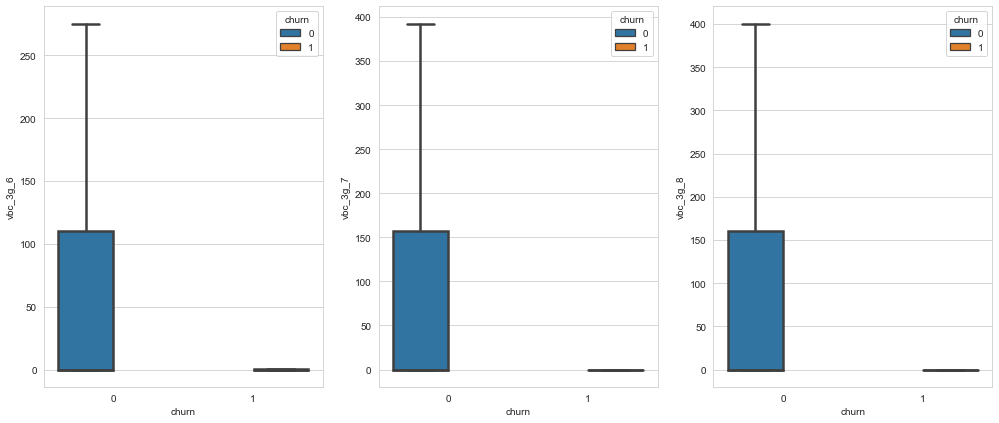

In [54]:
# let's check the volumne based cost for 3G
volumn_based_cost_3g = tele_df.columns[tele_df.columns.str.contains('vbc_3g')]

# analyze volume based cost
analyze_features('vbc_3g')

We can clearly see that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month.

In [55]:
# Let us define new derived columns
# 3g volume based cost for good phase: vbc_3g_good_ph
tele_df['vbc_3g_good_ph'] = (tele_df['vbc_3g_6'] + tele_df['vbc_3g_7'])/2

# drop the original columns as these are not longer required
tele_df.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

##### sachet subscription

In [56]:
# let's check sachet subscription for 2G/3G
sachet_2g_or_3g = tele_df.columns[tele_df.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(tele_df.loc[:,sachet_2g_or_3g].describe())

pd.DataFrame([tele_df.loc[tele_df.churn==0,sachet_2g_or_3g].mean()
              ,tele_df.loc[tele_df.churn==1,sachet_2g_or_3g].mean()],index={'Non Churned','Churned'})

        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_3g_6   sachet_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.066064      1.214026      1.054865      0.209393      0.227492   
std        2.507197      2.736158      2.535940      0.985674      1.089929   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       42.000000     48.000000     44.000000     29.000000     35.000000   

        sachet_3g_8  
count  30001.000000  
mean       0.202393  
std        1.100107  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       41.000000  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Churned,1.069289,1.244368,1.127042,0.206703,0.228247,0.215110
Non Churned,1.030928,0.883426,0.268438,0.238699,0.219270,0.063838


There is a steep drop in sachet services in 8th month for churned cutsomers as compared to non churned customers

In [57]:
# Let us define two new derived columns
# 2G sachet for good phase: sachet_2g_good_ph
# 3G sachet for good phase: sachet_3g_good_ph
tele_df['sachet_2g_good_ph'] = (tele_df.sachet_2g_6 + tele_df.sachet_2g_7)/2
tele_df['sachet_3g_good_ph'] = (tele_df.sachet_3g_6 + tele_df.sachet_3g_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

##### date related variables

In [58]:
# extract the date columns
date_columns = tele_df.columns[tele_df.columns.str.contains('date')]

# convert to datetime
for date_col in list(date_columns):
    tele_df[date_col]= pd.to_datetime(tele_df[date_col])

In [59]:
print(tele_df.last_date_of_month_6.dt.day.unique(),tele_df.last_date_of_month_7.dt.day.unique()
      ,tele_df.last_date_of_month_8.dt.day.unique())

# as only 1 unique value last day of month is present these columns are not adding much information
# let us drop the columns
tele_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

[30] [31. nan] [31. nan]


In [60]:
# let's extract the day of last recharge
tele_df['day_of_last_rech_6'] =  tele_df.date_of_last_rech_6.dt.day
tele_df['day_of_last_rech_7'] =  tele_df.date_of_last_rech_7.dt.day
tele_df['day_of_last_rech_8'] =  tele_df.date_of_last_rech_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([tele_df.loc[tele_df.churn==0,dt_of_last_rech_cols].median()
              ,tele_df.loc[tele_df.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Churned,28.0,29.0,29.0
Non Churned,28.0,27.0,26.0


We can see that the median value for last recharge is bit lower for churned customers

In [61]:
# let's define a new derived column indicating the shift in day of last recharge

tele_df['day_of_last_rech_shift'] = tele_df.day_of_last_rech_8 -(tele_df.day_of_last_rech_6+tele_df.day_of_last_rech_7)/2

In [62]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([tele_df.loc[tele_df.churn==0,['day_of_last_rech_shift']].median()
              ,tele_df.loc[tele_df.churn==1,['day_of_last_rech_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_shift
Churned,0.5
Non Churned,-2.0


We can clearly see that a large negative shift is indicating churn

In [63]:
# let's delete the other colummns derived as are no longer required
tele_df.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

In [64]:
# let's extract the day of last recharge for data
tele_df['day_of_last_rech_data_6'] =  tele_df.date_of_last_rech_data_6.dt.day
tele_df['day_of_last_rech_data_7'] =  tele_df.date_of_last_rech_data_7.dt.day
tele_df['day_of_last_rech_data_8'] =  tele_df.date_of_last_rech_data_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([tele_df.loc[tele_df.churn==0,dt_of_last_rech_cols].median()
              ,tele_df.loc[tele_df.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Churned,22.0,24.0,23.0
Non Churned,23.0,20.0,15.0


In [65]:
# let's define a new derived column indicating the shift in day of last data recharge

tele_df['day_of_last_rech_data_shift'] = tele_df.day_of_last_rech_data_8 -(tele_df.day_of_last_rech_data_6+tele_df.day_of_last_rech_data_7)/2

In [66]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([tele_df.loc[tele_df.churn==0,['day_of_last_rech_data_shift']].median()
              ,tele_df.loc[tele_df.churn==1,['day_of_last_rech_data_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_shift
Churned,-0.5
Non Churned,-6.0


In [67]:
# let's delete the other colummns derived as are no longer required
tele_df.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

In [68]:
# let us drop the date columns as we have derived day of month variables from them
tele_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
tele_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [69]:
tele_df.shape

(30001, 137)

##### average revenue per user

Churn Stats (mean and standard deviation):
{6: 'arpu_6', 7: 'arpu_7', 8: 'arpu_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,549.23,562.86,533.26,447.05,474.10,504.14
Non Churned,659.36,538.11,239.87,579.28,537.32,386.45


<Figure size 1224x504 with 0 Axes>

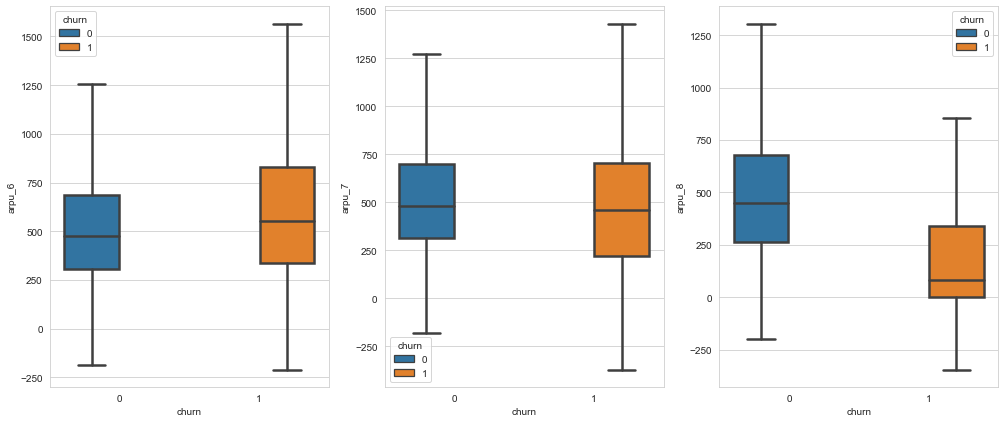

In [70]:
# extract columns for average revenue per user
arpu_cols = tele_df.columns[tele_df.columns.str.contains('arpu_')]

# analyze arpu
analyze_features('arpu')

We can see that arpu also drops signficantly in action phase for churned customers

In [71]:
# Let us define new derived columns
# arpu for good phase: arpu_good_ph
tele_df['arpu_good_ph'] = (tele_df.arpu_6 + tele_df.arpu_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

##### Minutes of Usage related variables

In [72]:
# let's derive minutes of usage columns
mou_cols = tele_df.columns[tele_df.columns.str.contains('mou')]
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [73]:
# let's check if there are any zero variation columns among these
zero_var_cols = tele_df.loc[:,mou_cols].std()[tele_df.loc[:,mou_cols].std()==0].index.values

zero_var_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype=object)

In [74]:
# let's drop these columns
tele_df.drop(list(zero_var_cols),axis=1,inplace=True)

In [75]:
# let's check the % of null values among mou variables
mou_cols = tele_df.columns[tele_df.columns.str.contains('mou')]
(100*tele_df.loc[:,mou_cols].isnull().sum()/len(tele_df.loc[:,mou_cols])).sort_values(ascending=False)

isd_ic_mou_8        3.913203
loc_og_t2m_mou_8    3.913203
spl_og_mou_8        3.913203
std_og_mou_8        3.913203
std_og_t2f_mou_8    3.913203
std_og_t2m_mou_8    3.913203
loc_ic_t2t_mou_8    3.913203
std_og_t2t_mou_8    3.913203
loc_ic_t2m_mou_8    3.913203
loc_og_mou_8        3.913203
loc_ic_t2f_mou_8    3.913203
loc_og_t2c_mou_8    3.913203
loc_ic_mou_8        3.913203
isd_og_mou_8        3.913203
std_ic_t2t_mou_8    3.913203
loc_og_t2f_mou_8    3.913203
std_ic_t2m_mou_8    3.913203
onnet_mou_8         3.913203
loc_og_t2t_mou_8    3.913203
spl_ic_mou_8        3.913203
std_ic_t2f_mou_8    3.913203
roam_og_mou_8       3.913203
std_ic_mou_8        3.913203
offnet_mou_8        3.913203
roam_ic_mou_8       3.913203
roam_ic_mou_6       1.816606
std_og_mou_6        1.816606
offnet_mou_6        1.816606
std_og_t2f_mou_6    1.816606
roam_og_mou_6       1.816606
                      ...   
roam_og_mou_7       1.789940
std_ic_mou_7        1.789940
loc_og_t2f_mou_7    1.789940
loc_og_t2t_mou

So, for all minutes of usage columns the maximum missing % is 3.19 which seems that in these cases the mobile has not been used at all for that particular call type(ic,std etc.), thus it is safe to assume that we can impute the missing values with zero.

In [76]:
# replaceing null values by 0 for minutes of usage variables
tele_df.loc[:,mou_cols] = tele_df.loc[:,mou_cols].replace(np.NaN,0)

Lets now now analyze the sub groups of minutes of usage, following groups are there:
                                                                                                                               
og: outgoing calls                                                                                                           ic: incoming calls                                                                                                                                                                                                                                             Let us start by analyzing minutes for usage variables for month 6

In [77]:
# let's collect mou variables for month 6
mou_6 = tele_df.columns[tele_df.columns.str.contains('mou_6')]
mou_6

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [78]:
# Let's check the outgoing mou variables.

mou_og_cols6 = tele_df.columns[tele_df.columns.str.contains('.*_og_.*mou_6',regex=True)]

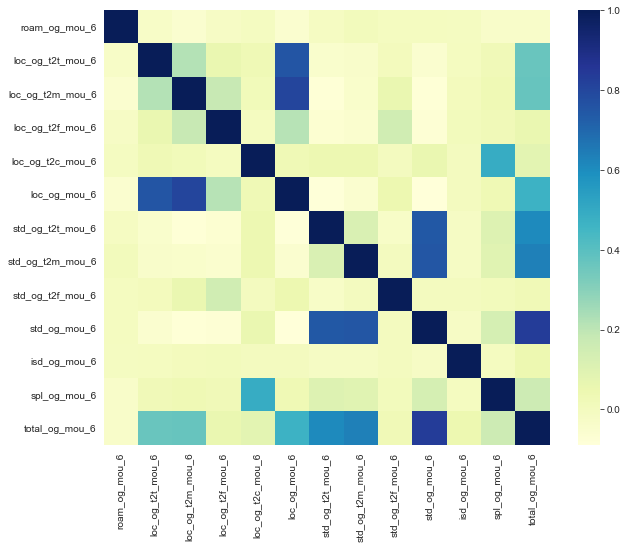

In [79]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(tele_df.loc[:,mou_og_cols6].corr(), cmap="YlGnBu")
plt.show()

After analyzing the variables, we acertain the following rlationships among variables:                                         

total_og_mou_6 = loc_og_mou_6+std_og_mou_6+spl_og_mou_6+isd_og_mou_6+ roam_og_mou_6+og_others_6                                 
std_og_mou_6 = std_og_t2m_mou_6+std_og_t2t_mou_6+std_og_t2f_mou_6 + std_og_2tc_mou_6                                           
loc_og_mou_6 = loc_og_t2m_mou_6+loc_og_t2t_mou_6+loc_og_t2f_mou_6 + loc_og_2tc_mou_6

In [80]:
print(tele_df.loc[7,'total_og_mou_6'],tele_df.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

print(tele_df.loc[7,'std_og_mou_6'],tele_df.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())

print(tele_df.loc[7,'loc_og_mou_6'],tele_df.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

487.53 487.52000000000004
60.86 60.849999999999994
422.16 422.15


In [81]:
# As total_og_mou_6, std_og_mou_6 and loc_og_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_og_cols = tele_df.columns[tele_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

print(ls_total_og_cols)

tele_df.drop(ls_total_og_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


In [82]:
# let's define good phase derived variables for all og components:
tele_df['spl_og_mou_good_ph'] = (tele_df.spl_og_mou_6 + tele_df.spl_og_mou_7)/2
tele_df['isd_og_mou_good_ph'] = (tele_df.isd_og_mou_6 + tele_df.isd_og_mou_7)/2
tele_df['roam_og_mou_good_ph'] = (tele_df.roam_og_mou_6 + tele_df.roam_og_mou_7)/2
tele_df['std_og_t2m_mou_good_ph'] = (tele_df.std_og_t2m_mou_6 + tele_df.std_og_t2m_mou_7)/2
tele_df['std_og_t2t_mou_good_ph'] = (tele_df.std_og_t2t_mou_6 + tele_df.std_og_t2t_mou_7)/2
tele_df['std_og_t2f_mou_good_ph'] = (tele_df.std_og_t2f_mou_6 + tele_df.std_og_t2f_mou_7)/2

tele_df['loc_og_t2m_mou_good_ph'] = (tele_df.loc_og_t2m_mou_6 + tele_df.loc_og_t2m_mou_7)/2
tele_df['loc_og_t2t_mou_good_ph'] = (tele_df.loc_og_t2t_mou_6 + tele_df.loc_og_t2t_mou_7)/2
tele_df['loc_og_t2f_mou_good_ph'] = (tele_df.loc_og_t2f_mou_6 + tele_df.loc_og_t2f_mou_7)/2
tele_df['loc_og_t2c_mou_good_ph'] = (tele_df.loc_og_t2c_mou_6 + tele_df.loc_og_t2c_mou_7)/2

In [83]:
# drop all the original og mou variables
ls_og = tele_df.columns[tele_df.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(ls_og)

tele_df.drop(ls_og,axis=1,inplace=True)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
       'spl_og_mou_7'],
      dtype='object')


##### Let's check for incoming mou variables

In [84]:
mou_ic_cols6 = tele_df.columns[tele_df.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_ic_cols6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

As with og mou variables above, we observe the following relationship among ic (incoming)mou variables:

total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + roam_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6                       
loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6                                           
std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6+std_ic_t2c_mou_6                                         

In [85]:
print(tele_df.loc[7,'total_ic_mou_6'],tele_df.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

print(tele_df.loc[7,'loc_ic_mou_6'],tele_df.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())

print(tele_df.loc[7,'std_ic_mou_6'],tele_df.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

626.46 626.92
427.88 427.86
180.54 180.51999999999998


In [86]:
# As total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_ic_cols = tele_df.columns[tele_df.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

tele_df.drop(ls_total_ic_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [87]:
# let's define good phase derive variables for all ic components:
tele_df['spl_ic_mou_good_ph'] = (tele_df.spl_ic_mou_6 + tele_df.spl_ic_mou_7)/2
tele_df['isd_ic_mou_good_ph'] = (tele_df.isd_ic_mou_6 + tele_df.isd_ic_mou_7)/2
tele_df['roam_ic_mou_good_ph'] = (tele_df.roam_ic_mou_6 + tele_df.roam_ic_mou_7)/2
tele_df['std_ic_t2m_mou_good_ph'] = (tele_df.std_ic_t2m_mou_6 + tele_df.std_ic_t2m_mou_7)/2
tele_df['std_ic_t2t_mou_good_ph'] = (tele_df.std_ic_t2t_mou_6 + tele_df.std_ic_t2t_mou_7)/2
tele_df['std_ic_t2f_mou_good_ph'] = (tele_df.std_ic_t2f_mou_6 + tele_df.std_ic_t2f_mou_7)/2

tele_df['loc_ic_t2m_mou_good_ph'] = (tele_df.loc_ic_t2m_mou_6 + tele_df.loc_ic_t2m_mou_7)/2
tele_df['loc_ic_t2t_mou_good_ph'] = (tele_df.loc_ic_t2t_mou_6 + tele_df.loc_ic_t2t_mou_7)/2
tele_df['loc_ic_t2f_mou_good_ph'] = (tele_df.loc_ic_t2f_mou_6 + tele_df.loc_ic_t2f_mou_7)/2

In [88]:
# drop all the original og mou variables
ls_ic = tele_df.columns[tele_df.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

print(ls_ic)

tele_df.drop(ls_ic,axis=1,inplace=True)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'isd_ic_mou_6', 'isd_ic_mou_7'],
      dtype='object')


##### offnet usage

In [89]:
offnet_cols = tele_df.columns[tele_df.columns.str.contains('offnet',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'offnet_mou_6', 7: 'offnet_mou_7', 8: 'offnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,364.92,377.79,352.68,463.15,489.51,490.20
Non Churned,469.29,381.51,143.30,650.11,591.94,325.64


<Figure size 1224x504 with 0 Axes>

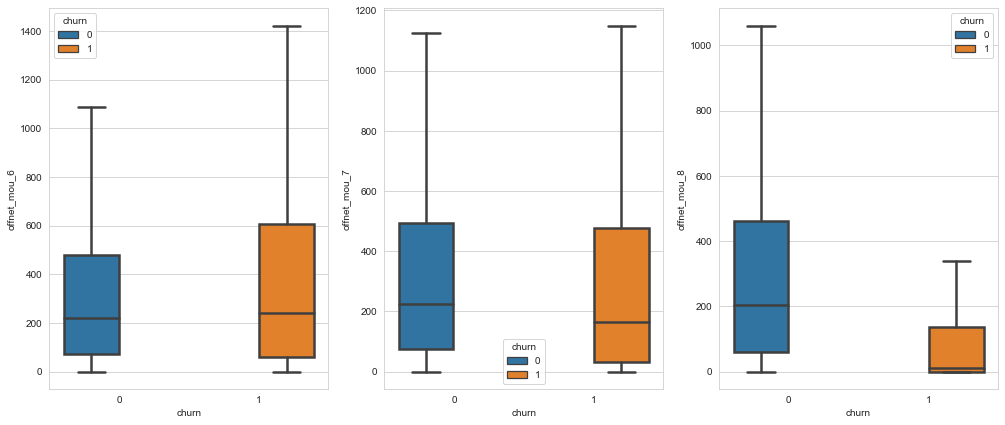

In [90]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_features('offnet_mou')

There is a substantial decrease in offnet mou for action month.

In [91]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
tele_df['offnet_mou_good_ph'] = (tele_df.offnet_mou_6 + tele_df.offnet_mou_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

##### minutes of usage related variables within same operator network

In [92]:
#let's extract the minutes of usage related columns
onnet_cols =  tele_df.columns[tele_df.columns.str.contains('^onnet.*mou',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'onnet_mou_6', 7: 'onnet_mou_7', 8: 'onnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,250.86,265.59,244.98,441.95,474.22,466.25
Non Churned,369.03,292.15,115.71,610.30,538.45,341.05


<Figure size 1224x504 with 0 Axes>

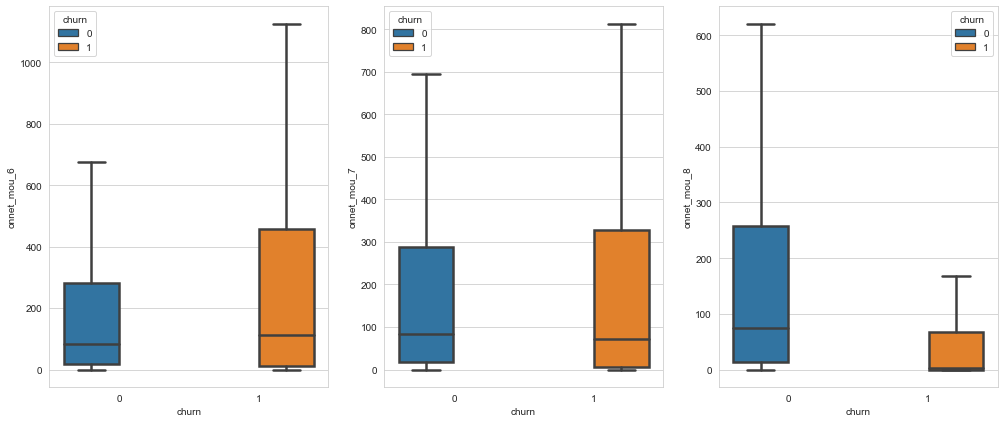

In [93]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_features('onnet_mou')

We again see that there is a drop in minutes of usage in the action month (8th month) for churned customers

In [94]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
tele_df['onnet_mou_good_ph'] = (tele_df.onnet_mou_6 + tele_df.onnet_mou_7)/2

# drop the original columns as these are not longer required
tele_df.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [95]:
# let's check summary stats for oc others and ic others mou
ls_others = tele_df.columns[tele_df.columns.str.contains('_others')]

print(tele_df.loc[:,ls_others].describe())

        og_others_6   og_others_7   og_others_8   ic_others_6   ic_others_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean       0.673323      0.043687      0.059953      1.174790      1.527682   
std        4.144797      2.701071      3.381939     14.113843     16.141140   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.060000      0.000000   
max      609.810000    370.130000    394.930000   1344.140000   1495.940000   

        ic_others_8  
count  28827.000000  
mean       1.274322  
std       13.038515  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.060000  
max     1209.860000  


In [96]:
# Let us define two new derived columns
# OG others for good phase: og_others_good_ph
# IC otherd for good phase: ic_others_good_ph
tele_df['og_others_good_ph'] = (tele_df.og_others_6 + tele_df.og_others_7)/2
tele_df['ic_others_good_ph'] = (tele_df.ic_others_6 + tele_df.ic_others_6)/2


# drop the original columns as these are not longer required
tele_df.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

Let's check if there are any more columns with more than 20% NA values remaining

In [97]:
is_more_than_20 = tele_df.isnull().sum()/len(tele_df) > 0.2
100*tele_df.loc[:,is_more_than_20].isnull().sum()/len(tele_df.loc[:,is_more_than_20])

night_pck_user_6               44.148528
night_pck_user_7               43.145228
night_pck_user_8               46.825106
fb_user_6                      44.148528
fb_user_7                      43.145228
fb_user_8                      46.825106
day_of_last_rech_data_shift    59.904670
dtype: float64

In [98]:
# lets drop these columns as we have already captured internet volume usage and total data amount recharged.
# also we have captured day of last recharge shift as well.
tele_df.drop(tele_df.columns[is_more_than_20],axis=1,inplace=True)

In [99]:
# let's check how many variables are remaining!!
tele_df.shape

(30001, 79)

In [100]:
is_na = tele_df.isnull().sum()/len(tele_df) > 0
100*tele_df.loc[:,is_na].isnull().sum()/len(tele_df.loc[:,is_na])

og_others_8               3.913203
ic_others_8               3.913203
day_of_last_rech_shift    2.306590
og_others_good_ph         2.606580
ic_others_good_ph         1.816606
dtype: float64

We can observe that these have very few values a NA indicating that there is no usage in these variables by customer. Let's impute these values by 0.

In [101]:
tele_df.loc[:,:] = tele_df.loc[:,:].replace(np.NaN,0)

### 3. Model Building

In this section we will build multiple machine learning models to accurately predict customers who might churn in the action phase (8th Month)

In [102]:
# Putting feature variable to X
X = tele_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = tele_df['churn']

###### Additional feature engineering
We will do some additional feature transformation to achieve better accuracy in our predictive model. We know from EDA above that a drop in action phase parameter as compared to good phase value is highly indicative of a likely churn, let's use this heuristic to derive action phase column which is actually the difference between good phase feature value and action phase (8th month) feature value and discard the 8th month feature columns.

In [103]:
# extract good phase feature list and 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

In [104]:
# define function to calculate difference between 8th month feature and good phase feature
def FindDiff(x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff)

In [105]:
# create a feature data frame copy from original features
X_diff = X.copy()

In [106]:
# extract features without any good phase or 8th month indicator.
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [107]:
# create new derived columns for action phase.
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(FindDiff)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [108]:
# drop 8th month columns as we have already derived action phase columns.
X_diff.drop(f_8,axis=1,inplace=True)

###### Feature Standardisation

In [109]:
# import standard scalar
from sklearn.preprocessing import StandardScaler

# extract columns
cols = X_diff.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X_diff)

# convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [110]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

Let's define a function to print out evaluation metrics, as we have customer churn as positive class (1) we would try to maximize sensitivity at the same time trying to keep auc_score at a good level.

In [111]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

# define function to calculate and print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    print("f1 Score: ",f1_score(y_test,y_pred))

In [112]:
# let's start by building as basic logistic regression model
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()

In [113]:
lsr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# predict results on test
y_pred = lsr.predict(X_test)

In [115]:
# print model evaluation metrics
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[8125  106]
 [ 552  218]]
Sensitivity:  0.2831168831168831
Specificity:  0.9871218563965496
AUC Score:  0.6351193697567163
Precision:  0.6728395061728395
f1 Score:  0.3985374771480804


We do see from above that the sesitivity and auc score is pretty low, this is because the data imbalanced with only 8.4% values for churn. We will do imbalanced class handling to rectify this.

Imbalanced class handling                                                                                                                                                                                                                                                                                                        
In this section we will try to reduce class imbalance by trying out a techniques:

SMOTE resampling: by generating synthetic samples for the minority class.

SMOTE resampling

In [116]:
# import SMOTE sampler from imblearn library
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular", random_state=42)

Using TensorFlow backend.


In [117]:
# SMOTE sampling the training data
X_sm_1, y_sm_1 = smote.fit_sample(X_train, y_train)

In [118]:
# function to undersample majority class
def MajorityClassUnderSampler(X_train,y_train):
    # create training data frame
    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    # select the minority class (in our case churn)
    df_train_minority_class  = df_train.loc[df_train.churn == 1,:]
    
    # create data frame with majority class samples same as minority class
    df_train_majority_undersampled = pd.concat([df_train_minority_class,df_train.loc[df_train.churn == 0,:].sample(df_train_minority_class.shape[0])])

    return df_train_majority_undersampled

In [119]:
# create majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_sm = df_train_mju.drop('churn',axis=1)
y_sm = df_train_mju.churn

In [120]:
lsr = LogisticRegression()
lsr.fit(X_sm_1,y_sm_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
y_pred = lsr.predict(X_test)
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[6818 1413]
 [ 129  641]]
Sensitivity:  0.8324675324675325
Specificity:  0.8283319159275908
AUC Score:  0.8303997241975617
Precision:  0.3120740019474197
f1 Score:  0.4539660056657225


### Dimenesionality Reduction with PCA
As the number of features are quite high, let's try dimensionality reduction with PCA and try model creation on reduced feature set.

In [122]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(svd_solver='randomized', random_state=101)

In [124]:
pca.fit(X_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
    svd_solver='randomized', tol=0.0, whiten=False)

In [125]:
# let's check the features with top PCA components
colnames = list(X_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-9.686406e-17,-2.651822e-17,circle_id
1,2.149969e-02,5.058913e-02,aon
2,5.524678e-03,-1.003298e-01,total_rech_amt_good_ph
3,-2.140422e-01,6.774438e-01,total_rech_amt_data_good_ph
4,-4.028171e-05,7.445631e-03,max_rech_amt_good_ph


Let's draw a scree plot to determine number of features which capture the highest variance.

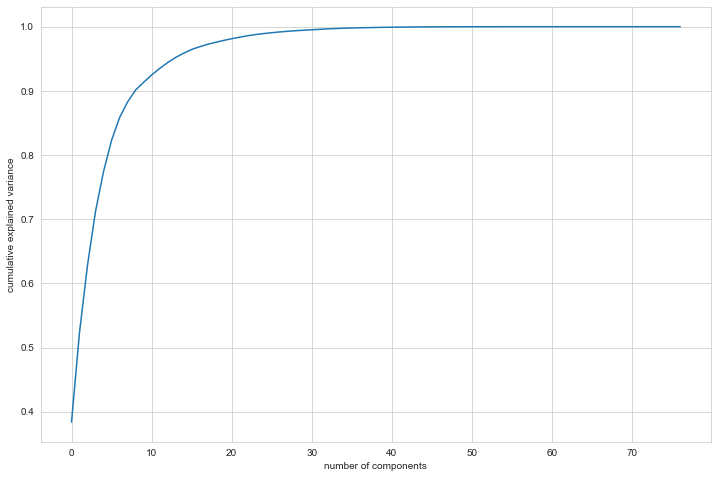

In [126]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We see from above that around ~ 60 features capture 90% variance, let's reduce our feature set to 60

In [127]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [128]:
X_train_pca = pca_final.fit_transform(X_sm)

X_train_pca.shape

(3504, 40)

In [129]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 40)

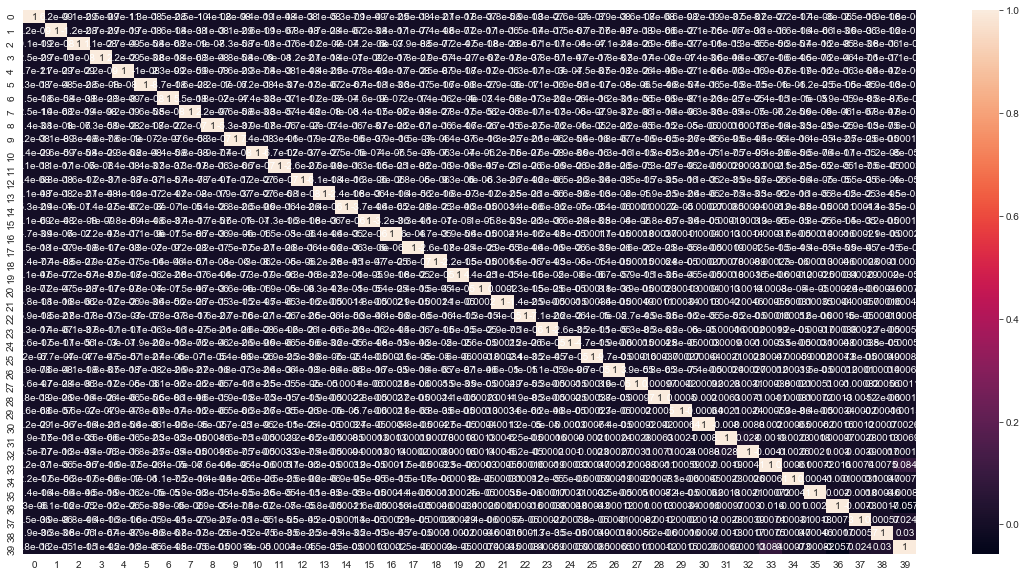

In [130]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [131]:
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(X_train_pca,y_sm)

In [132]:
y_pred = lr_pca.predict(X_test_pca)

In [133]:
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[6584 1647]
 [ 130  640]]
Sensitivity:  0.8311688311688312
Specificity:  0.7999028064633702
AUC Score:  0.8155358188161007
Precision:  0.279842588543944
f1 Score:  0.4187111547268564


##### Adjusting probability threshold cutoff for logistic regression
We will now try to select the optimum probability threshold for our model

In [134]:
# check the predicted probabilities
y_pred_prob = lr_pca.predict_proba(X_test_pca)

In [135]:
# create predicted probability data frame
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)

In [136]:
# renaming column
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn,ID,Churn_Prob
0,1,20296,0.607046
1,1,8279,0.547103
2,0,72269,0.096719
3,0,65602,0.329604
4,1,42758,0.855915


In [137]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

,ID,churn,Churn_Prob
0,20296,1,0.607046
1,8279,1,0.547103
2,72269,0,0.096719
3,65602,0,0.329604
4,42758,1,0.855915


In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,20296,1,0.607046,1,1,1,1,1,1,1,0,0,0
1,8279,1,0.547103,1,1,1,1,1,1,0,0,0,0
2,72269,0,0.096719,1,0,0,0,0,0,0,0,0,0
3,65602,0,0.329604,1,1,1,1,0,0,0,0,0,0
4,42758,1,0.855915,1,1,1,1,1,1,1,1,1,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.085546  0.000000  1.000000  0.085546
0.1   0.1  0.388512  0.334589  0.964935  0.119453
0.2   0.2  0.525942  0.487669  0.935065  0.145838
0.3   0.3  0.633041  0.606974  0.911688  0.178308
0.4   0.4  0.724586  0.710363  0.876623  0.220660
0.5   0.5  0.802577  0.799903  0.831169  0.279843
0.6   0.6  0.865793  0.873770  0.780519  0.366463
0.7   0.7  0.905788  0.925404  0.696104  0.466087
0.8   0.8  0.917120  0.956870  0.492208  0.516349
0.9   0.9  0.922009  0.987608  0.220779  0.625000


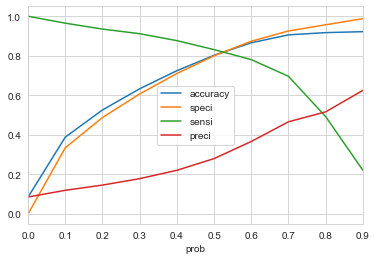

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

In [141]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

##### Baseline Model

In [142]:
#Let's check the overall accuracy.
printMetrics(y_pred_final.churn, y_pred_final.final_predicted)

Confusion Matrix: 
 [[6655 1576]
 [ 133  637]]
Sensitivity:  0.8272727272727273
Specificity:  0.8085287328392662
AUC Score:  0.8179007300559967
Precision:  0.2878445549028468
f1 Score:  0.4270868253436138


The above is our baseline model, which has been created
Now in sections below we will create multiple models where we would try to maximize the sensitivity and f1 score.



#### Decision Tree: AdaBoost Model
First let us start with boosting models as they are known to perform better for imbalanced class problems

In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [144]:
# create a shallow tree
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [145]:
# estimating the optimum number of estimators
estimators = list(range(40, 150, 10))

auc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_sm, y_sm)
    y_pred = ABC.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    auc_scores.append(score)

In [146]:
# check the auc scores
auc_scores

[0.8301944501859457,
 0.8296435553269474,
 0.8300499221347235,
 0.8241450203301741,
 0.8284139624195511,
 0.8196833478755481,
 0.8241492015456297,
 0.826036507533288,
 0.8222241857280128,
 0.8232987581001189,
 0.8236632338624806]

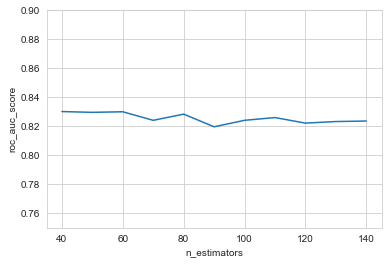

In [147]:
# plot test scores and n_estimators
plt.plot(estimators, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc_score')
plt.ylim([0.75, 0.9])
plt.show()

In [148]:
# create model for the best n estimators value
ABC = AdaBoostClassifier(n_estimators=120,base_estimator=shallow_tree)

In [149]:
# fit the model
ABC.fit(X_sm,y_sm)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

In [150]:
# check prediction on test set
y_pred_abc =  ABC.predict(X_test)

In [151]:
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[6796 1435]
 [ 140  630]]
Sensitivity:  0.8181818181818182
Specificity:  0.8256590936702709
AUC Score:  0.8219204559260446
Precision:  0.3050847457627119
f1 Score:  0.4444444444444445


#### Gradient Boosting Model

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
# create parameter grid for learning rate and subsample
# parameter grid
param_grid = {"learning_rate": [0.1,0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [154]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [155]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=3)

grid_search_GBC.fit(X_sm, y_sm)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:   38.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
                                                  presort=

In [156]:
# check the best parameters obtained
grid_search_GBC.best_params_

{'learning_rate': 0.1, 'subsample': 0.6}

In [157]:
# run gradient boosting with optimum parameters
GBC = GradientBoostingClassifier(learning_rate=0.1,subsample=0.3)

# fit and predict
GBC.fit(X_sm,y_sm)
y_pred_abc =  GBC.predict(X_test)
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[7086 1145]
 [ 121  649]]
Sensitivity:  0.8428571428571429
Specificity:  0.8608917506985786
AUC Score:  0.8518744467778607
Precision:  0.3617614269788183
f1 Score:  0.5062402496099845


Note: multiple parameters were tuned at this stage but the most relevant one was found to be scale_pos_weight which can be used to apply weightage to minority class.

In [158]:
# import xgboost libraries
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [159]:
# first build default xgboost model
XGB = XGBClassifier()

XGB.fit(X_sm,y_sm)
y_pred_xgb =  XGB.predict(X_test)
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[7086 1145]
 [ 121  649]]
Sensitivity:  0.8428571428571429
Specificity:  0.8608917506985786
AUC Score:  0.8518744467778607
Precision:  0.3617614269788183
f1 Score:  0.5062402496099845


In [160]:
# creating a KFold cross validation 
folds = 3

# specify range of hyperparameters
param_grid = {'scale_pos_weight': [1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=3)

In [161]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=3,
             param_grid={'scale_pos_weight': [1.8, 1.81, 1.82, 1.83, 1.84, 1.85,
                                              1.86, 1.87, 1.88, 1.89]},
             pre_

In [162]:
# check the best parameters
model_cv.best_params_

{'scale_pos_weight': 1.87}

In [163]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':1,
         'objective':'binary:logistic',
          'scale_pos_weight': 1.87}

# fit model on training data
XGB = XGBClassifier(params = params)
XGB.fit(X_sm,y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'scale_pos_weight': 1.87,
                      'subsample': 1},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [164]:
# check the preddiction
y_pred_xgb =  XGB.predict(X_test)
printMetrics(y_test,y_pred_xgb)

Confusion Matrix: 
 [[7129 1102]
 [ 107  663]]
Sensitivity:  0.861038961038961
Specificity:  0.866115903292431
AUC Score:  0.863577432165696
Precision:  0.3756373937677054
f1 Score:  0.5230769230769231


We can increase the sensitivity a bit by trading off slightly on f1 score, let's increase scale_pos_weight to 1.9

In [165]:
XGB = XGBClassifier(scale_pos_weight=2.05)

XGB.fit(X_sm,y_sm)
y_pred_xgb =  XGB.predict(X_test)
printMetrics(y_test,y_pred_xgb)

Confusion Matrix: 
 [[6601 1630]
 [  67  703]]
Sensitivity:  0.912987012987013
Specificity:  0.8019681691167537
AUC Score:  0.8574775910518834
Precision:  0.30132876125160735
f1 Score:  0.4531098936513051


#### Ensemble Model creation

In this section we create an ensemble model using decision trees, random forest, linear regression and Linear SVM model. The final prediction is done using majority vote.

In [166]:
# load the required libraries
from sklearn.tree import DecisionTreeClassifier

In [167]:
# set hyper parameters
grid_search_best_params_ = {'max_depth': 13,
                            'max_features': 25,
                            'min_samples_leaf': 95,
                            'min_samples_split': 20,
                            'random_state': 10}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X_sm, y_sm)
printMetrics(y_test, dtree.predict(X_test))

Confusion Matrix: 
 [[6381 1850]
 [ 129  641]]
Sensitivity:  0.8324675324675325
Specificity:  0.7752399465435549
AUC Score:  0.8038537395055436
Precision:  0.25732637494981936
f1 Score:  0.39313094142900956


In [168]:
# import linear SVM
from sklearn.svm import LinearSVC

# Build linear SVM model
SVM = LinearSVC()
SVM.fit(X_train_pca, y_sm)
printMetrics(y_test, SVM.predict(X_test_pca))

Confusion Matrix: 
 [[5585 2646]
 [ 242  528]]
Sensitivity:  0.6857142857142857
Specificity:  0.6785323775968898
AUC Score:  0.6821233316555877
Precision:  0.166351606805293
f1 Score:  0.26774847870182555


In [169]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
RF = RandomForestClassifier(**grid_search_best_params_, n_estimators=20)
RF.fit(X_sm, y_sm)
printMetrics(y_test, RF.predict(X_test))

Confusion Matrix: 
 [[6832 1399]
 [ 155  615]]
Sensitivity:  0.7987012987012987
Specificity:  0.8300328028186126
AUC Score:  0.8143670507599556
Precision:  0.30536246276067525
f1 Score:  0.4418103448275862


In [170]:
# build logistic regression model
LR = LogisticRegression()
LR.fit(X_sm, y_sm)
printMetrics(y_test, RF.predict(X_test))

Confusion Matrix: 
 [[6832 1399]
 [ 155  615]]
Sensitivity:  0.7987012987012987
Specificity:  0.8300328028186126
AUC Score:  0.8143670507599556
Precision:  0.30536246276067525
f1 Score:  0.4418103448275862


Finally we will build ensemble mode below and take the majority vote!!

In [171]:
ENSEMBLE_MODEL_pred = list(map(lambda x: 1 if (sum(x)>=2) else 0, zip(LR.predict(X_test),
                                                          dtree.predict(X_test),            
                                                          RF.predict(X_test),                                                          
                                                          SVM.predict(X_test_pca))))
printMetrics(y_test, ENSEMBLE_MODEL_pred)

Confusion Matrix: 
 [[6231 2000]
 [ 106  664]]
Sensitivity:  0.8623376623376623
Specificity:  0.7570161584254647
AUC Score:  0.8096769103815634
Precision:  0.24924924924924924
f1 Score:  0.38672102504368083


##### Summary of prediction models
Below is the summary of the model scores obtained on test data:

Baseline Model: sensitivity:0.83 specificity:0.809 f1 score:0.43 auc score: 0.82                                             
Best Model (XgBoost): sensitivity:0.90 specificity:0.80 f1 score:0.46 auc score: 0.86
##### Understanding the parameters for Customer Churn
In this section we try to understand the parameters for customer churn and if any corrective action that can be taken by operator.We will be using the following approach:

Create logistic regression model without doing PCA on complete feature set.
remove initial unimportant features by doing a LASSO penalty, also tune alpha for the process.
On reduced feature set model obtained above do further reduction in features using p-value and VIF.
Obtain final model to do the analysis for churn.

In [172]:
# import stats model
import statsmodels.api as sm

In [173]:
# Putting feature variable to X
X = tele_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = tele_df['churn']

In [174]:
# extract columns
cols = X.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X)

# convert to data frame
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [175]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

# create majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

In [176]:
X_mju = X_mju.drop('circle_id', axis=1)
X_mju.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,offnet_mou_good_ph,onnet_mou_good_ph,og_others_good_ph,ic_others_good_ph
18,-0.172731,0.744082,-0.208145,-0.168644,-0.189707,-0.253055,-0.467038,-0.220818,1.869065,1.021836,...,-0.134625,-0.169589,-0.153405,-0.289824,-0.309798,-0.339520,0.020118,0.068143,0.062970,-0.082473
29,-0.492906,-0.320723,-0.599449,3.706077,1.110747,-0.343393,-0.649485,-0.301836,-0.207789,-0.373383,...,-0.319392,-0.181980,-0.153405,-0.659340,-0.379253,-0.350795,-0.773565,-0.524058,-0.099419,-0.082473
34,0.054896,-0.442811,0.700342,-0.161898,-0.140527,-0.317840,0.184472,-0.301836,0.212576,-0.309769,...,0.214580,-0.126286,-0.153405,-0.431780,-0.418833,-0.353049,0.815560,-0.522102,-0.142046,-0.082473
44,-0.176466,-0.506723,-0.623720,0.225695,0.133640,-0.343393,-0.646490,-0.301836,-0.236923,-0.373383,...,-0.319392,-0.201966,-0.153405,-0.729557,-0.420265,-0.353049,-0.576833,-0.593125,-0.142046,-0.082473
48,-1.013237,-0.510671,-0.695102,-0.168644,-0.189707,-0.343393,-0.649485,-0.301836,-0.236923,-0.373383,...,1.198282,0.035733,-0.126601,-0.560693,-0.359082,-0.264432,0.289628,1.361629,-0.142046,1.541328


In [177]:
X_test=X_test.drop('circle_id', axis=1)

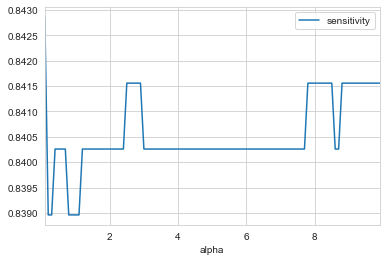

In [178]:
## Lasso Regression Feature Selection
possible_alpha = [i/10 for i in range(1, 100)]
alpha_sensitivity = []

for alpha in possible_alpha:
    lassolr = LogisticRegression(C=alpha, penalty='l1', solver='liblinear')
    lassolr.fit(X_mju, y_mju)
    cp = confusion_matrix(y_test, lassolr.predict(X_test))
    alpha_sensitivity.append({"alpha": alpha, "sensitivity": cp[1,1]/(cp[1,0]+cp[1,1])})

pd.DataFrame(alpha_sensitivity).plot.line(x='alpha', y='sensitivity')

From above we can see that sensitivity is maximized for alpha = 3. Let's run model with LASSO (l1) penalty and drop all features with zero coefficients.

In [179]:
# run with alpha=0.4 and penalty = 'l1'
lassolr = LogisticRegression(C=3, penalty='l1', solver='liblinear')
lassolr.fit(X_mju, y_mju)
LR_coefs = dict(zip(X_mju.columns, lassolr.coef_[0]))
{k:v for k,v in LR_coefs.items() if v == 0}

{'std_og_t2t_mou_8': 0.0, 'std_og_t2m_mou_good_ph': 0.0}

We will now create our model, let's create a function to train model and print the model metrics, VIF values with the additional facility to drop columns which are passed in 'cols_to_drop' parameter of the function.

We will run the below function iteratively to reduce features and arrive at final model.

In [180]:
# function to test model, print metrics, VIF score and can drop columns
def test_model(x_train, x_test, y_train, y_test, cols_to_drop = None):
    cols_to_drop = cols_to_drop or []
    x_train = x_train.drop(cols_to_drop, axis=1)
    x_test = x_test.drop(cols_to_drop, axis=1)
    lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
    lr.fit(x_train, y_train)
    print("Scoring on TEST {}, TRAIN {}".format(lr.score(x_test,y_test), lr.score(x_train,y_train)))
    printMetrics(y_test,lr.predict(x_test))
    x_train = sm.add_constant(x_train)
    stat_model = sm.Logit(y_train, x_train).fit_regularized(method='l1')
    print(stat_model.summary())
    # calculate VIF
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    for i, var in enumerate(x_train.columns):
        ## Even if we are doing a logistic regression above
        ## Do a Linear Regression here as we are just trying 
        ## to fing the variance of the features, how multicollinear
        rsq = sm.OLS(x_train[var], x_train.drop([var], axis=1)).fit().rsquared
        vif = round( 1 / (1 - rsq + 0.00000000001), 2)
        vif_df.loc[i] = [var, vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [181]:
# run model on majority undersampled training data
test_model(X_mju, X_test, y_mju, y_test)

Scoring on TEST 0.8133540717698033, TRAIN 0.8410388127853882
Confusion Matrix: 
 [[6674 1557]
 [ 123  647]]
Sensitivity:  0.8402597402597403
Specificity:  0.8108370793342242
AUC Score:  0.8255484097969823
Precision:  0.29355716878402904
f1 Score:  0.4351042367182246
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.39920967523610673
            Iterations: 432
            Function evaluations: 432
            Gradient evaluations: 432
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3504
Model:                          Logit   Df Residuals:                     3427
Method:                           MLE   Df Model:                           76
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.4241
Time:                        12:11:17   Log-Likelihood:                -1398.8
converged:                       True   LL-N

,Var,Vif
73,offnet_mou_good_ph,6896.45
2,onnet_mou_8,6717.40
74,onnet_mou_good_ph,6499.46
3,offnet_mou_8,6261.18
57,std_og_t2m_mou_good_ph,5744.40
58,std_og_t2t_mou_good_ph,5179.28
10,std_og_t2t_mou_8,4925.52
11,std_og_t2m_mou_8,4304.56
6,loc_og_t2t_mou_8,1520.49
61,loc_og_t2t_mou_good_ph,1469.80


##### Dropping variables with high p-value and high VIF

In [182]:
cols_to_drop=["onnet_mou_8", "std_og_t2m_mou_8", "onnet_mou_good_ph",
       "offnet_mou_good_ph", "roam_ic_mou_good_ph", "loc_og_t2m_mou_good_ph",
      "og_others_8", "total_rech_amt_good_ph", "total_rech_amt_8", "isd_ic_mou_good_ph",
      "arpu_8", "vol_3g_mb_8", "loc_og_t2f_mou_good_ph", "isd_og_mou_8",
      "loc_ic_t2f_mou_good_ph", "spl_og_mou_good_ph", "std_ic_t2m_mou_good_ph",
      "std_og_t2f_mou_good_ph", "total_rech_amt_data_good_ph", "max_rech_data_good_ph",
      "std_ic_t2f_mou_good_ph", "loc_og_t2f_mou_8", "vbc_3g_good_ph", "isd_og_mou_good_ph",
      "total_rech_amt_data_8", "max_rech_amt_good_ph", "total_rech_num_good_ph",
      "sachet_2g_good_ph", "ic_others_8", "std_ic_t2f_mou_8", "og_others_good_ph",
      "ic_others_good_ph", "roam_ic_mou_8", "monthly_3g_good_ph", "loc_ic_t2m_mou_8",
      "loc_ic_t2m_mou_good_ph", "isd_ic_mou_8", "loc_og_t2c_mou_good_ph", "last_day_rch_amt_good_ph",
      "std_og_t2f_mou_8", "sachet_3g_good_ph", "sachet_3g_8", "std_og_t2t_mou_good_ph",
      "spl_ic_mou_good_ph", "loc_og_t2c_mou_8", "spl_og_mou_8", "vbc_3g_8",
      "vol_3g_mb_good_ph", "roam_og_mou_good_ph", "monthly_2g_8", "monthly_3g_8",
      "loc_og_t2t_mou_good_ph", "loc_og_t2t_mou_8", "max_rech_amt_8", "spl_ic_mou_8",
      "std_ic_t2t_mou_good_ph", "std_ic_t2m_mou_8", "std_ic_t2t_mou_8","std_og_t2m_mou_good_ph"]


LR_FEATURES = list(set(X_mju.columns) - set(cols_to_drop))

In [183]:
test_model(X_mju, X_test, y_mju, y_test, cols_to_drop=cols_to_drop)

Scoring on TEST 0.7955782690812132, TRAIN 0.8216324200913242
Confusion Matrix: 
 [[6528 1703]
 [ 137  633]]
Sensitivity:  0.8220779220779221
Specificity:  0.7930992588992832
AUC Score:  0.8075885904886028
Precision:  0.2709760273972603
f1 Score:  0.407598197037991
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.43261184619812876
            Iterations: 80
            Function evaluations: 80
            Gradient evaluations: 80
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3504
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           17
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.3759
Time:                        12:11:21   Log-Likelihood:                -1515.9
converged:                       True   LL-Null: 

,Var,Vif
5,loc_ic_t2t_mou_8,2.10
17,loc_ic_t2t_mou_good_ph,1.97
1,offnet_mou_8,1.71
3,loc_og_t2m_mou_8,1.67
7,total_rech_num_8,1.59
10,vol_2g_mb_8,1.56
13,vol_2g_mb_good_ph,1.55
8,last_day_rch_amt_8,1.35
11,sachet_2g_8,1.31
16,arpu_good_ph,1.31


From the above, we can directly see that train accuracy coming out is 82% and test accuracy coming out is 79.5%.

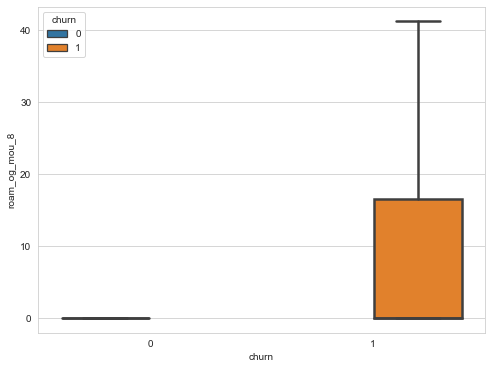

In [184]:
## Variables with positive coef
## higher the value ==> more likely to churn

plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
# High variance in Roam Outgoing Minutes of Usage, => probability of churn is high 
# if roaming minutes of usage increases. Same is apparent from the positive coef of the LR model
sns.boxplot(data=tele_df, y="roam_og_mou_8", x="churn", hue="churn", linewidth=2.5, showfliers=False)

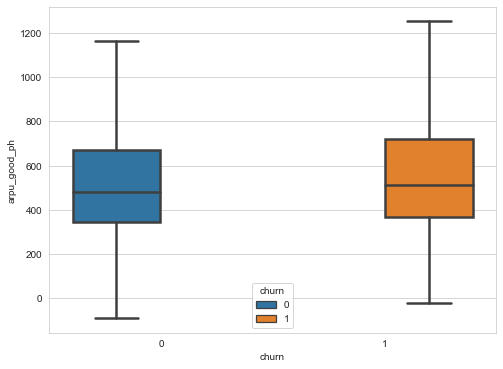

In [185]:
# High variance in ARPU of 8th month, => Customers are using some costly feature => high probability of churn
plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
sns.boxplot(data=tele_df, y="arpu_good_ph", x="churn", hue="churn", linewidth=2.5, showfliers=False)

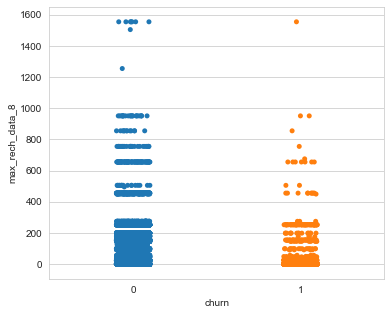

In [186]:
plt.rcParams["figure.figsize"] = [6, 5]
sns.stripplot(x="churn", y="max_rech_data_8", data=tele_df, jitter=True)

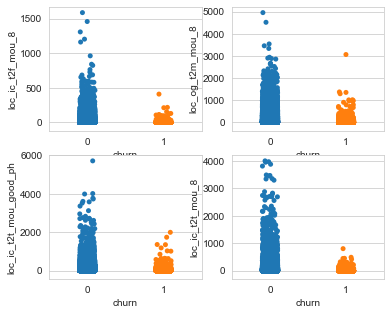

In [187]:
f,axes = plt.subplots(nrows=2, ncols=2)

sns.stripplot(x="churn", y="loc_ic_t2f_mou_8", data=tele_df, jitter=True, ax=axes[0][0])
sns.stripplot(x="churn", y="loc_og_t2m_mou_8", data=tele_df, jitter=True, ax=axes[0][1])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_good_ph", data=tele_df, jitter=True, ax=axes[1][0])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_8", data=tele_df, jitter=True, ax=axes[1][1])

Our model shows that good phase and action phase parameters have relative impact on customer churn. If some good phase indicator are in high range and we see a drop in some other action phase parameter value it indicates a strong possibility of churn.

###### Some good phase indicators which when increase lower the possibility of churn are:

arpu_good_ph: average revenue per user: if the average revenue for customer is high in good phase then there is a less liklihood of default.

loc_ic_t2t_mou_good_ph: incoming local calls within operator network: if the minutes of usage for such calls is high in good phase then lower is the possibility of default.

vol_2g_mb_good_ph: volume of 2G data usage: if volumne of 2G data usage is high in good phase then there is less probability of default.

aon: age on network: as age on network increases for a customer there is a decrease in chances of churn.

###### Some of the action phase indicators for customer churn are as follows:

- loc_ic_t2t_mou_8: local incoming calls within same telecom network: if the local incoming calls for t2t drop in action phase then there are high chances of default.

- local outgoing calls from telecom operator to other network mobile: again indicates a high possibility of customer churn.

- vol_2g_mb_8/sachet_2g_8: volumne of 2G usage and sachet(small) topup for 2G data: a drop in 2G usage volume of sachet top-ups is also highly indicative of churn.

- max_rech_data_8: maximum data recharge: as above if the maximum data recharge done by customer drops in action phase then it also indicates a tendency to default.

- loc_ic_t2f_mou_8: local incoming calls from fixed line: a drop in calls from fixed line to customer is also highly suggestive of churn.

- day_of_last_rech_shift: shift in day of last recharge as compared to previous month: if the last recharge is not in the last week of month then this behaviour is also highly indicative of churn.

- roam_og_mou_8: roaming outgoing calls: if there is an increase in outgoing roaming calls can cause customer churn from the operator, this might be because customer is incurring high roaming charges and hence would want to switch to a local number.

Apart from the above model based features we have also noticed in EDA that the % of churn is higher for 2G usage as compared to 3G usage suggesting that some users may be migrating to other operators due to availability of better 3G network.

Also, in some cases there is a small increase in calls to call centre in 7th month followed by drop in 8th month, which indicates that customers might be calling for some issues based on which they might have left the network.

In [188]:
# vol 2g/3g usage
ls_3g_2g = tele_df.columns[tele_df.columns.str.contains('vol_2g_mb|vol_3g_mb',regex=True)]

# let's check the mean variation in total recharge numbers for churned and non churned customers
pd.DataFrame([tele_df.loc[tele_df.churn==0,ls_3g_2g].mean()
              ,tele_df.loc[tele_df.churn==1,ls_3g_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_good_ph,vol_3g_mb_good_ph
Churned,113.562745,375.776694,128.269817,367.256201
Non Churned,22.564389,86.916594,99.005613,247.959207


##### Recommendations to reduce Customer Churn
###### Based on modeling an EDA following are our recommendations to reduce customer churn:

- Lower tariffs on data usage,a better 2G area coverage where 3G is not available.
- Expansion of 3G network where 3G is currently not available.
- Lower roaming charges as this is one of the reasons for pre-paid customers to seek out local operators when on roaming.
- Customized pre-paid plan offers: Continuous monitoring of behavioural signs listed above in action phase to offer customized pre-paid plans to customers, for example customized plans based on where customer minutes of usage (mou) are higher (outgoing/std/t2t/t2m etc).
- Privilege Customer offers: for customer who are staying longer with network to increase customer loyalty to the telecom operator, provide some good offer.

## Thank You!!